<h1>Лабораторная работа №7 Жигиталиевой Нурайым Аин-2-21<h1/>

<h3>дайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным</h3>

In [23]:
import os
os.listdir('laba7db')

['test', 'train']

In [24]:
from sklearn.datasets import load_files
reviews_train = load_files('laba7db/train/')
text_train, y_train = reviews_train.data, reviews_train.target

In [25]:
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 42
text_train[1]:
b"FUTZ is the only show preserved from the experimental theatre movement in New York in the 1960s (the origins of Off Off Broadway). Though it's not for everyone, it is a genuinely brilliant, darkly funny, even more often deeply disturbing tale about love, sex, personal liberty, and revenge, a serious morality tale even more relevant now in a time when Congress wants to outlaw gay marriage by trashing our Constitution. The story is not about being gay, though -- it's about love and sex that don't conform to social norms and therefore must be removed through violence and hate. On the surface, it tells the story of a man who falls in love with a pig, but like any great fable, it's not really about animals, it's about something bigger -- stifling conformity in America.<br /><br />The stage version won international acclaim in its original production, it toured the U.S. and Europe, and with others of its kind, influ

In [26]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [27]:
print("text_train[1]:\n{}".format(text_train[1]))

text_train[1]:
b"FUTZ is the only show preserved from the experimental theatre movement in New York in the 1960s (the origins of Off Off Broadway). Though it's not for everyone, it is a genuinely brilliant, darkly funny, even more often deeply disturbing tale about love, sex, personal liberty, and revenge, a serious morality tale even more relevant now in a time when Congress wants to outlaw gay marriage by trashing our Constitution. The story is not about being gay, though -- it's about love and sex that don't conform to social norms and therefore must be removed through violence and hate. On the surface, it tells the story of a man who falls in love with a pig, but like any great fable, it's not really about animals, it's about something bigger -- stifling conformity in America.  The stage version won international acclaim in its original production, it toured the U.S. and Europe, and with others of its kind, influenced almost all theatre that came after it. Luckily, we have preserve

In [28]:
import numpy as np
np.unique(y_train)

array([0, 1])

In [29]:
reviews_train = load_files('laba7db/test/')
text_test, y_test =reviews_train.data, reviews_train.target
print("Количество документов в текстовых данных: {}".format(len(text_test)))

Количество документов в текстовых данных: 42


In [30]:
print("Количество примеров на класс (обучение - training: {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение - training: [21 21]


In [31]:
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)

In [33]:
print("X_train:\n {}".format(repr(X_train)))

X_train:
 <42x2011 sparse matrix of type '<class 'numpy.int64'>'
	with 4689 stored elements in Compressed Sparse Row format>


In [34]:
vect

CountVectorizer()

In [35]:
feature_names = vect.get_feature_names_out()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20 признаков: \n {}".format(feature_names[:20]))

Количество признаков: 2011
Первые 20 признаков: 
 ['08' '10' '11' '15' '1920' '1960s' '1969' '1972' '1990' '20' '2003'
 '2007' '2008' '30' '35' '50' '60s' '70s' '72nd' '8½']


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [37]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean value of cross_val_score: {:.2f}".format(np.mean(scores)))

Mean value of cross_val_score: 0.74


In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=100), param_grid, cv=5)
grid.fit(X_train, y_train)
print("The best cross_val: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

The best cross_val: 0.74
Best parameters:  {'C': 0.01}


In [39]:
X_test = vect.transform(text_test)

In [40]:
print("The best score on test set: {:.2f}".format(grid.score(X_test, y_test)))

The best score on test set: 0.36


<h3>Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»</h3>

In [42]:
stop_words = ["a","an","and","the", "is","it","for","of","with","in","on","at","to","from",
"by","that","this","but","not","no","can","be","has","are"]

In [43]:
print("Количество стоп-слов: {}".format(len(stop_words)))

Количество стоп-слов: 24


In [44]:
vect = CountVectorizer(stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop-words: \n {}".format(repr(X_train)))

X_train with stop-words: 
 <42x1795 sparse matrix of type '<class 'numpy.int64'>'
	with 2968 stored elements in Compressed Sparse Row format>


In [45]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("The best cross_val: {:.2f}".format(grid.best_score_))

The best cross_val: 0.82


<h3>Масштабируйте данные с помощью tf-idf</h3>

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [47]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), LogisticRegression(max_iter=100)) 
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Haилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))

Haилучшее значение перекрестной проверки: 0.64


In [48]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"] 

X_train = vectorizer.transform(text_train)

max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

In [49]:
print("Признаки с наименьшими значениями fidf:\n{}".format(feature_names [sorted_by_tfidf[:20]]))
print("Признаки с наибольшими значениями tfdf: \n{}".format(feature_names [sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями fidf:
['72nd' '11' 'attack' 'abilities' 'bland' 'bip' '1960s' '2003' 'bad'
 'ability' 'barrels' '90s' 'audience' 'avoid' 'as' 'acting' 'amount'
 'because' 'action' 'blank']
Признаки с наибольшими значениями tfdf: 
['account' 'appeared' 'adult' 'area' '30' 'based' 'against' 'background'
 'actors' 'altering' '50' 'also' 'ago' 'became' '20' 'appears' 'almost'
 'been' 'again' 'basic']


In [50]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idƒ:\n{}".format(feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idƒ:
['20' 'basic' 'appears' 'been' 'always' 'altering' 'almost' 'became'
 'based' 'adult' 'addition' '35' 'about' 'afterthought' 'being' 'board'
 'bitches' '2008' 'analyze' '60s' '1990' 'appreciation' '1920' 'appeared'
 'anymore' 'becoming' '30' 'back' 'badly' 'americana' 'april' 'after'
 'awkward' 'be' 'advised' 'adults' 'appear' 'again' 'art' 'absolutely'
 '08' 'areas' 'associates' 'bigger' 'bette' 'adolescents' 'basically'
 'actor' 'allowing' 'ago' 'beats' '1969' 'blue' 'antagonist' 'age' 'area'
 'angry' 'begins' 'all' 'any' 'abroad' '10' 'abuse' 'arnold' '72nd' 'best'
 'anyways' 'bombasticities' 'are' 'absurd' 'admire' 'african' 'anything'
 'anyone' 'ashamed' 'america' 'beginning' 'aspect' 'attack' 'am' '70s'
 '2007' 'abusive' 'an' '11' 'afraid' 'bit' 'bible' 'believe' 'according'
 '15' 'accompanied' 'awakening' 'aggressive' 'background' 'actress' 'beer'
 'annoying' 'abstract' 'also']


In [51]:
import matplotlib.pyplot as plt

# Получите коэффициенты модели
coefficients = grid.best_estimator_.named_steps["logisticregression"].coef_

# Выведите первые 20 коэффициентов
top_coefficients = np.argsort(coefficients.ravel())[-20:]
bottom_coefficients = np.argsort(coefficients.ravel())[:20]

feature_names = np.array(vectorizer.get_feature_names_out())

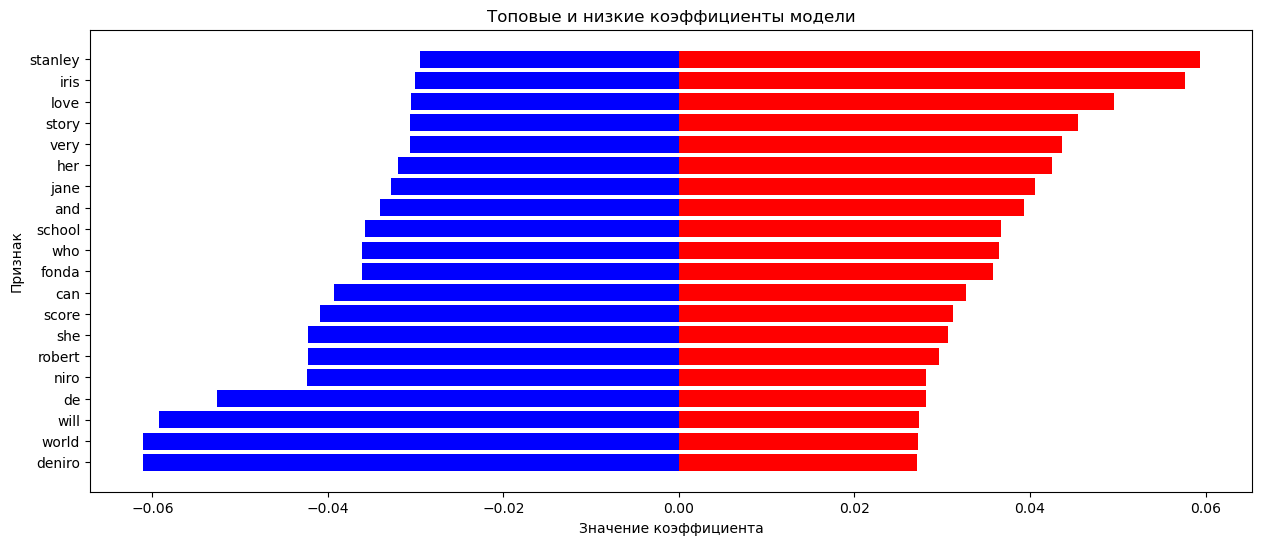

In [52]:
# Визуализация топовых и низких коэффициентов
plt.figure(figsize=(15, 6))
plt.barh(range(len(top_coefficients)), coefficients.ravel()[top_coefficients], color='red')
plt.barh(range(len(bottom_coefficients)), coefficients.ravel()[bottom_coefficients], color='blue')
plt.yticks(range(len(top_coefficients)), feature_names[top_coefficients])
plt.xlabel("Значение коэффициента")
plt.ylabel("Признак")
plt.title("Топовые и низкие коэффициенты модели")
plt.show()

In [53]:
coefficients = grid.best_estimator_.named_steps["logisticregression"].coef_
print("Размерности коэффициентов модели: {}".format(coefficients.shape))
print("Коеффициенты: {}".format(coefficients.ravel()[:]))

Размерности коэффициентов модели: (1, 204)
Коеффициенты: [ 0.018442    0.00527444 -0.02263762  0.00837139 -0.03606602 -0.02661063
 -0.00452515  0.00313656 -0.00966436  0.03926513 -0.02250901  0.00810733
 -0.03008485  0.02493062 -0.00686525 -0.03200719 -0.0110547   0.00144879
 -0.00876465 -0.00517446  0.01154551  0.01054929  0.00075296  0.0058101
 -0.02009003 -0.02273842 -0.00541672 -0.02741718  0.0326586   0.00232258
 -0.01049357  0.025705   -0.01269394  0.02810631  0.02707456  0.00297218
 -0.02771061 -0.00543836 -0.00828108  0.00116596 -0.00075337  0.02473208
 -0.0168006  -0.01431036  0.00850336  0.00912622  0.00575994 -0.03054553
  0.00512531 -0.00390032 -0.01334445 -0.01141135  0.011196   -0.01926062
 -0.02509764  0.02392535 -0.01093653  0.03575878 -0.00418199 -0.00296456
 -0.01043585  0.01881539 -0.00818682  0.00260866  0.00243663 -0.00084031
 -0.0160539  -0.00189771 -0.00722435  0.04249783  0.01893404 -0.02407372
  0.00022093  0.00652001  0.00908326  0.00971417  0.00659768  0.0213

In [54]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression()) 

param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 
print("Best parameters: \n{}".format(grid.best_params_))

Best cross-validation score: 0.84
Best parameters: 
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}


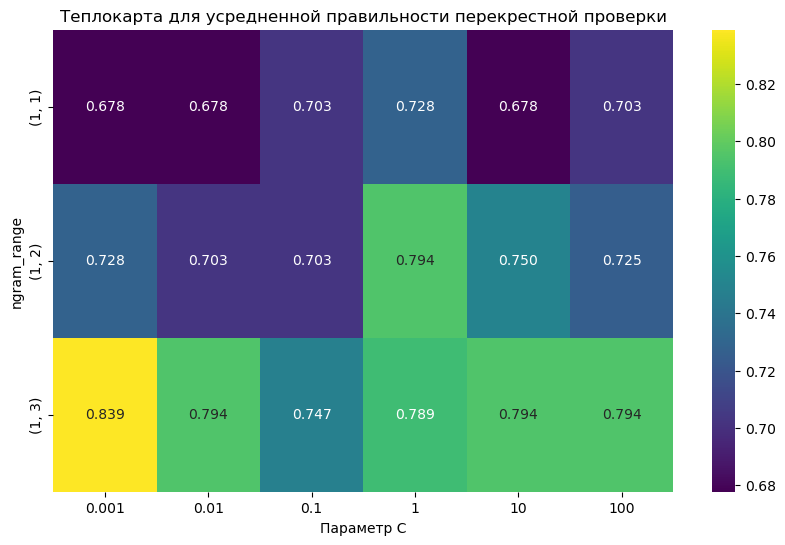

In [55]:
import seaborn as sns

grid_mean_scores = np.array(grid.cv_results_['mean_test_score']).reshape(3, 6)

plt.figure(figsize=(10, 6))
sns.heatmap(grid_mean_scores, annot=True, fmt=".3f", xticklabels=param_grid['logisticregression__C'],
            yticklabels=[str(i) for i in param_grid['tfidfvectorizer__ngram_range']], cmap="viridis")
plt.xlabel('Параметр C')
plt.ylabel('ngram_range')
plt.title('Теплокарта для усредненной правильности перекрестной проверки')
plt.show()

<h2>Вывод</h2>
<br>Разработав "мешок слов" на основе отзывов о MIT, я применила библиотеку sklearn.datasets для загрузки данных, а затем использовала CountVectorizer для векторизации текста. Этот подход позволил представить текст в виде матрицы, где каждый столбец соответствует слову, а каждая строка - отдельному отзыву.

Применение логистической регрессии дало результат в 74%. Я провела анализ модели с использованием кросс-валидации, затем использовала GridSearchCV для поиска оптимальных параметров, что улучшило точность предсказаний.

Для дальнейшего улучшения модели я создала список стоп-слов, избавившись от неинформативных. Этот шаг повысил точность предсказаний на 8%, достигнув 82%.

Для учета важности слов в документах я применила масштабирование данных с использованием tf-idf. Это позволило учесть как частоту слова в документе, так и его значимость в контексте всего набора текстов. Были выделены наиболее и наименее значимые признаки.

Эта лабораторная работа позволила мне ознакомиться с основными этапами обработки текстовых данных, включая предварительную обработку, векторизацию, создание модели и ее оценку. Эксперименты с параметрами модели и различными техниками обработки текста сделали модель более эффективной, позволяя улучшить ее результаты.